Bài tập 1 (kỹ thuật đọc và xử lý dữ liệu từ file .csv): Cho trước file dữ liệu advertising.csv, hãy hoàn thành function prepare_data(file_name_dataset) trả về dữ liệu đã được tổ chức (X cho input và y cho output).

In [1]:
# dataset
import numpy as np
import matplotlib . pyplot as plt
import random

def get_column(data, index):
    result = [row[index] for row in data]
    return result

# Hàm chuẩn bị dữ liệu từ file .csv (giữ nguyên code của đề bài)
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # Lấy cột TV (index = 0)
    tv_data = get_column(data, 0)

    # Lấy cột Radio (index = 1)
    radio_data = get_column(data, 1)

    # Lấy cột Newspaper (index = 2)
    newspaper_data = get_column(data, 2)

    # Lấy cột Sales (index = 3)
    sales_data = get_column(data, 3)

    # Xây dựng X là input và y là output cho training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

# Gọi hàm với file advertising.csv đã tải lên
X, y = prepare_data('/content/advertising.csv')

# Kiểm tra kết quả với 5 giá trị đầu tiên
list_sum = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list_sum)

[624.1, 175.10000000000002, 300.5, 78.9]


Bài tập 2 (kỹ thuật huấn luyện data dùng one sample - linear regression): Sử dụng kết quả dữ liệu đầu vào X, và dữ liệu đầu ra y từ bài 1, để phát triển chương trình dự đoán thông tin sales (y) từ X bằng cách dùng giải thuật linear regression with one sample-training với loss được tính bằng công thức Mean Squared Error L = (ˆy − y)2. Sơ đồ hoạt động của giải thuật được mô tả ở hình 2. Nhiệm vụ của bạn là hoàn thành function implement_linear_regression(X_data, y_data, epoch_max, lr)
và trả về 4 tham số w1, w2, w3, b và lịch sử tính loss như bên dưới.

In [2]:
import random

# Hàm khởi tạo tham số ban đầu
def initialize_params(randomize=False):
    if randomize:
        # Khởi tạo ngẫu nhiên theo phân phối Gaussian
        w1 = random.gauss(mu=0.0, sigma=0.01)
        w2 = random.gauss(mu=0.0, sigma=0.01)
        w3 = random.gauss(mu=0.0, sigma=0.01)
        b = 0
    else:
        # Khởi tạo cố định giá trị w1, w2, w3 và b theo đề bài
        w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)

    return w1, w2, w3, b

In [3]:
# Khởi tạo tham số ban đầu (giữ nguyên code yêu cầu)
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

# Hàm dự đoán giá trị (y_hat)
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

# Hàm tính toán loss (MSE)
def compute_loss_mse(y, y_hat):
    return (y_hat - y) ** 2

# Hàm tính đạo hàm đối với w_i
def compute_gradient_wi(xi, y, y_hat):
    return 2 * (y_hat - y) * xi

# Hàm tính đạo hàm đối với bias b
def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

# Hàm cập nhật w_i
def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr * dl_dwi

# Hàm cập nhật bias b
def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db

In [4]:
# Hàm thực hiện Linear Regression
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # Lấy một sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Tính giá trị dự đoán
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính loss
            loss = compute_loss_mse(y, y_hat)

            # Tính đạo hàm (gradient) cho w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Cập nhật tham số
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Lưu lại loss
            losses.append(loss)

    return w1, w2, w3, b, losses

In [6]:
y = predict ( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print ( y )

1.0


In [8]:
# Hàm tính toán loss sử dụng Mean Squared Error (MSE)
def compute_loss(y_hat, y):
    # Tính MSE cho một cặp giá trị dự đoán và giá trị thực
    loss = (y_hat - y) ** 2
    return loss

In [9]:
l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


In [10]:
# Tính đạo hàm theo w_i
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * (y_hat - y) * xi
    return dl_dwi

In [12]:
# MSE loss
g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )

-1.0


In [11]:
# Tính đạo hàm theo b
def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db

In [13]:
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

-3.0


In [14]:
# Cập nhật trọng số wi
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi

In [18]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [16]:
# Cập nhật bias b
def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b

In [19]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

0.50001


w1 = 0.07405984066396477, w2 = 0.15917360263437663, w3 = 0.017561197559948935, b = 0.13924260940219846


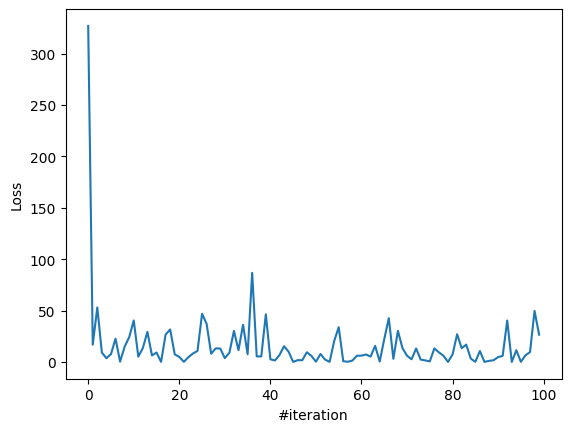

In [5]:
# Chuẩn bị dữ liệu từ file CSV
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # Lấy dữ liệu từ các cột
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    # X là input và y là output cho training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

# Gọi hàm prepare_data với file CSV đã tải lên
X, y = prepare_data('/content/advertising.csv')

# Gọi hàm implement_linear_regression để thực hiện huấn luyện
w1, w2, w3, b, losses = implement_linear_regression(X, y)

# In kết quả của các tham số w1, w2, w3 và bias b
print(f"w1 = {w1}, w2 = {w2}, w3 = {w3}, b = {b}")

# Vẽ đồ thị kết quả loss cho 100 lần cập nhật đầu tiên
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [20]:
# Gọi hàm để lấy dữ liệu
X, y = prepare_data('/content/advertising.csv')

# Thực hiện huấn luyện mô hình
w1, w2, w3, b, losses = implement_linear_regression(X, y)

# In kết quả các trọng số w1, w2, w3
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [21]:
# Dữ liệu mới cho dự đoán
tv = 19.2
radio = 35.9
newspaper = 51.3

# Chuẩn bị dữ liệu từ file 'advertising.csv'
X, y = prepare_data('/content/advertising.csv')

# Huấn luyện mô hình Linear Regression
w1, w2, w3, b, losses = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

# Dự đoán giá trị 'sales' với dữ liệu mới
sales = predict(tv, radio, newspaper, w1, w2, w3, b)

# In ra kết quả dự đoán
print(f'Predicted sales is {sales}')

Predicted sales is 8.176413319549823


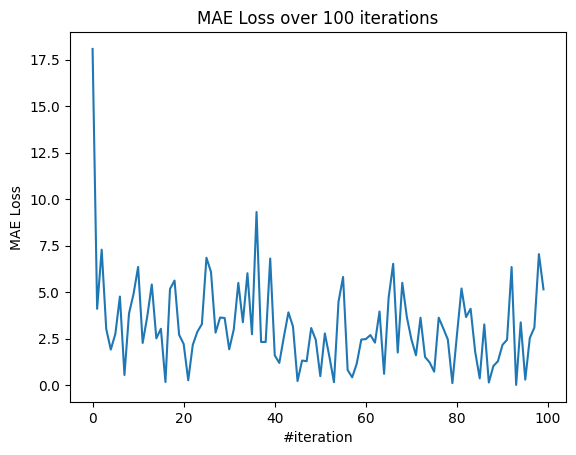

In [22]:
# Hàm tính toán loss sử dụng Mean Absolute Error (MAE)
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

def implement_linear_regression_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            # Lấy một sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Dự đoán giá trị
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính loss theo MAE
            loss = compute_loss_mae(y_hat, y)

            # Tính gradient
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Cập nhật các tham số
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Lưu lại loss
            losses.append(loss)

    return w1, w2, w3, b, losses

# Huấn luyện mô hình với loss MAE
w1, w2, w3, b, losses = implement_linear_regression_mae(X, y, epoch_max=50, lr=1e-5)

# Vẽ đồ thị kết quả loss cho 100 lần cập nhật đầu tiên
import matplotlib.pyplot as plt
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("MAE Loss")
plt.title("MAE Loss over 100 iterations")
plt.show()

In [23]:
l = compute_loss_mae ( y_hat =1 , y =0.5)
print ( l )

0.5


**Bài tập 3** (kỹ thuật huấn luyện data dùng batch **N samples** - linear regression): Cải tiến giải thuật ở bài tập 2, bằng cách huấn luyện giải thuật linear regression sử dụng **N samples-training**. Công việc của bạn ở bài tập này là bạn cần implement lại function `implement_linear_regression_nsamples` sử dụng **N sample-training** với **MSE loss function**:
$$L(\hat{y}, y) = \frac{1}{N} \sum_{i=1}^{N} (\hat{y} - y)^2$$
và **MAE loss function** (optional):
$$L(\hat{y}, y) = \frac{1}{N} \sum_{i=1}^{N} |\hat{y} - y|$$


In [29]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()  # Khởi tạo trọng số ban đầu
    N = len(y_data)  # Số lượng samples

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total  = 0.0

        # Duyệt qua tất cả các sample
        for i in range(N):
            # Lấy một sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y  = y_data[i]

            # Tính giá trị dự đoán
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính toán loss
            loss = compute_loss_mae(y, y_hat)

            # Cộng dồn loss
            loss_total += loss

            # Tính gradient cho w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db  = compute_gradient_b(y, y_hat)

            # Cộng dồn gradient
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total  += dl_db

        # Sau khi xử lý N samples, cập nhật trọng số w1, w2, w3, và b
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b  = update_weight_b(b, db_total / N, lr)

        # Ghi lại giá trị loss trung bình cho mỗi epoch
        losses.append(loss_total / N)

    return (w1, w2, w3, b, losses)


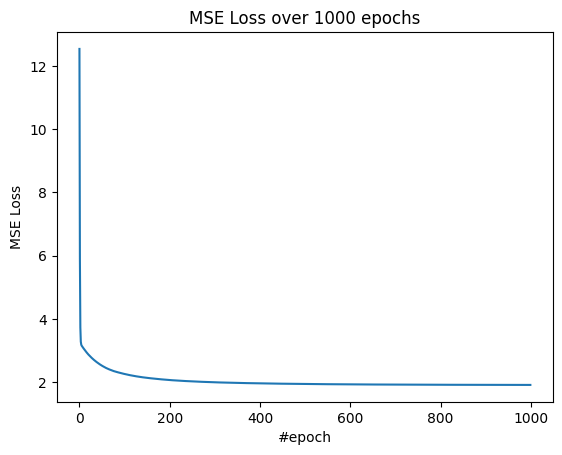

In [30]:
# Huấn luyện mô hình Linear Regression với batch training
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

# Vẽ đồ thị MSE loss sau 1000 epoch
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.title("MSE Loss over 1000 epochs")
plt.show()

0.06710990754044266 0.15756173831487585 0.029619799386084403


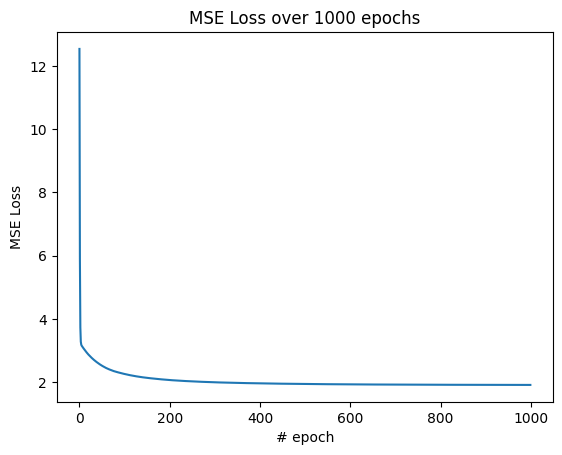

In [31]:
# Chuẩn bị dữ liệu từ file 'advertising.csv'
X, y = prepare_data('advertising.csv')

# Huấn luyện mô hình Linear Regression với MSE loss và batch training (1000 epoch)
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

# In kết quả của các trọng số w1, w2, w3
print(w1, w2, w3)

# Vẽ đồ thị loss qua các epoch
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MSE Loss")
plt.title("MSE Loss over 1000 epochs")
plt.show()

### Bài tập 4
Như chúng ta đã biết, mục đích của **linear regression** là tìm hàm xấp xỉ:

\[
y = ax_1 + bx_2 + cx_3 + bx_0
\]

Trong đó \(x_1\) là **TV**, \(x_2\) là **Radio**, \(x_3\) là **Newspapers**, và \(x_0 = 1\).

Đầu tiên, bạn cần tổ chức lại dữ liệu đầu vào ở bài tập 1 theo dạng danh sách các feature \([x_0, x_1, x_2, x_3]\).

Ví dụ theo hình 1, dữ liệu đầu vào dòng thứ 1 và 2 ta có thể tổ chức lại như sau:

X[0] = [1, x_1, x_2, x_3] = [1, 230.1, 37.8, 69.2]

X[1] = [1, x_1, x_2, x_3] = [1, 44.5, 39.3, 45.1]

....

X[199] = [1, x_1, x_2, x_3] = [1, 232.1, 8.6, 8.7]


In [34]:
def prepare_data_with_bias(file_name_dataset):
    # Đọc dữ liệu từ file CSV
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # Tạo dữ liệu TV, Radio, Newspaper, Sales
    tv_data = [row[0] for row in data]
    radio_data = [row[1] for row in data]
    newspaper_data = [row[2] for row in data]
    sales_data = [row[3] for row in data]

    # Tổ chức lại dữ liệu với bias x_0 = 1
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data

    return X, y

# Gọi hàm chuẩn bị dữ liệu
X, y = prepare_data_with_bias('/content/advertising.csv')

# Kiểm tra dữ liệu đầu vào
print("Dữ liệu đầu vào:")
print(X[:5])  # Hiển thị 5 hàng đầu tiên

Dữ liệu đầu vào:
[[1, 230.1, 37.8, 69.2], [1, 44.5, 39.3, 45.1], [1, 17.2, 45.9, 69.3], [1, 151.5, 41.3, 58.5], [1, 180.8, 10.8, 58.4]]


In [35]:
import random

def initialize_params():
    # Khởi tạo bias bằng 0
    bias = 0

    # Khởi tạo các trọng số w1, w2, w3 theo phân phối Gaussian với mu = 0.0 và sigma = 0.01
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    # Comment dòng này để sử dụng khởi tạo ngẫu nhiên cho real application
    # Trả về các trọng số cố định (chỉ dùng cho mục đích thử nghiệm)
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

    # Nếu muốn trả về giá trị ngẫu nhiên cho real application, comment dòng trên và bỏ comment dòng dưới
    # return [bias, w1, w2, w3]

In [36]:
# Hàm dự đoán đầu ra y_hat
def predict(X_features, weights):
    return sum(x * w for x, w in zip(X_features, weights))

# Hàm tính loss sử dụng MSE
def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

# Hàm tính gradient
def compute_gradient_w(X_features, y, y_hat):
    return [2 * (y_hat - y) * x for x in X_features]

# Hàm cập nhật trọng số
def update_weight(weights, dl_dweights, lr):
    return [w - lr * dw for w, dw in zip(weights, dl_dweights)]

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
Trọng số cuối cùng: [0.14712720331803966, 0.07402653465821023, 0.1590877644096093, 0.01752258469670093]


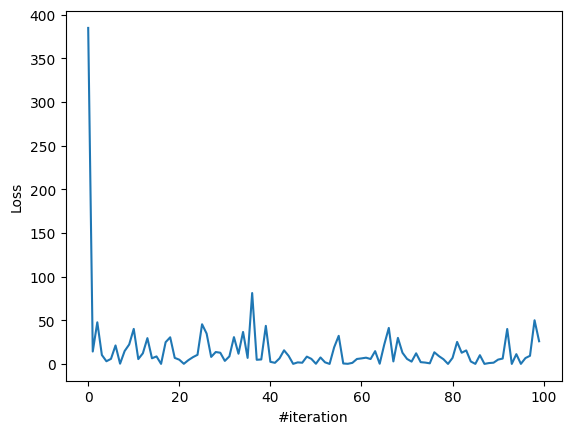

In [37]:
# Hàm Linear Regression
def implement_linear_regression(X_features, y_output, epoch_max=50, lr=1e-5):
    losses = []

    # Khởi tạo trọng số ban đầu
    weights = [random.gauss(0, 0.01) for _ in range(len(X_features[0]))]

    N = len(y_output)
    for epoch in range(epoch_max):
        print("epoch", epoch)
        for i in range(N):
            # Lấy một sample
            features_i = X_features[i]
            y = y_output[i]

            # Dự đoán đầu ra
            y_hat = predict(features_i, weights)

            # Tính toán loss
            loss = compute_loss(y_hat, y)

            # Tính gradient
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # Cập nhật trọng số
            weights = update_weight(weights, dl_dweights, lr)

            # Lưu lại loss
            losses.append(loss)

    return weights, losses

# Huấn luyện mô hình
weights, losses = implement_linear_regression(X, y)

# Hiển thị trọng số cuối cùng
print("Trọng số cuối cùng:", weights)

# Vẽ đồ thị loss
import matplotlib.pyplot as plt
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [44]:
# Chuẩn bị dữ liệu từ file 'advertising.csv'
X, y = prepare_data('advertising.csv')

# Huấn luyện mô hình Linear Regression với 50 epoch và learning rate là 1e-5
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

# Kiểm tra độ dài của danh sách loss (L) để tránh lỗi truy cập ngoài phạm vi
if len(L) > 9999:
    # In giá trị loss tại iteration 9999
    print(L[9999])
else:
    # In ra thông báo nếu không có đủ 9999 lần lặp
    print(f"Không đủ 9999 lần lặp, độ dài L hiện tại là {len(L)}")


epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.570435494315863


In [45]:
# Tăng số lượng epoch để có đủ lần lặp
W, L = implement_linear_regression(X, y, epoch_max=10000, lr=1e-5)

# In giá trị loss tại iteration 9999
print(L[9999])


Streaming output truncated to the last 5000 lines.
epoch 5001
epoch 5002
epoch 5003
epoch 5004
epoch 5005
epoch 5006
epoch 5007
epoch 5008
epoch 5009
epoch 5010
epoch 5011
epoch 5012
epoch 5013
epoch 5014
epoch 5015
epoch 5016
epoch 5017
epoch 5018
epoch 5019
epoch 5020
epoch 5021
epoch 5022
epoch 5023
epoch 5024
epoch 5025
epoch 5026
epoch 5027
epoch 5028
epoch 5029
epoch 5030
epoch 5031
epoch 5032
epoch 5033
epoch 5034
epoch 5035
epoch 5036
epoch 5037
epoch 5038
epoch 5039
epoch 5040
epoch 5041
epoch 5042
epoch 5043
epoch 5044
epoch 5045
epoch 5046
epoch 5047
epoch 5048
epoch 5049
epoch 5050
epoch 5051
epoch 5052
epoch 5053
epoch 5054
epoch 5055
epoch 5056
epoch 5057
epoch 5058
epoch 5059
epoch 5060
epoch 5061
epoch 5062
epoch 5063
epoch 5064
epoch 5065
epoch 5066
epoch 5067
epoch 5068
epoch 5069
epoch 5070
epoch 5071
epoch 5072
epoch 5073
epoch 5074
epoch 5075
epoch 5076
epoch 5077
epoch 5078
epoch 5079
epoch 5080
epoch 5081
epoch 5082
epoch 5083
epoch 5084
epoch 5085
epoch 5086
epo